<a href="https://colab.research.google.com/github/rodrigofer89/cybersecurity/blob/main/GlobalCyber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Apenas para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Padronização dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Modelo a ser utilizado
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Métricas de avaliação
from sklearn.metrics import classification_report, accuracy_score

### Importação de dados

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

### Analise exploratória

In [3]:
# Olhando o tamanho do dataset linhas e colunas
df.shape

(6362620, 11)

In [4]:
# Observando as primeiras cinco linhas
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# Observando os tipos de dados nas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### *Não temos valores nulos*

In [7]:
# Dados estatísticos
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


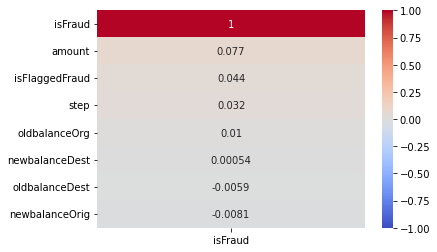

In [8]:
#Correlação
upp_mat = np.triu(df.corr())
sb.heatmap(df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False), vmin = - 1, vmax = + 1, annot = True, cmap = 'coolwarm')

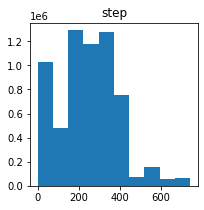

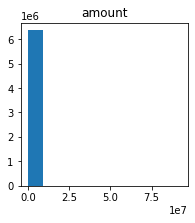

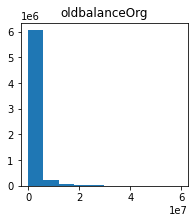

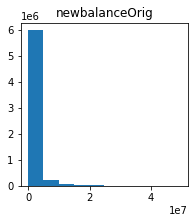

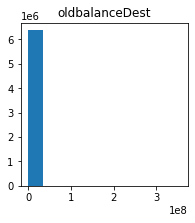

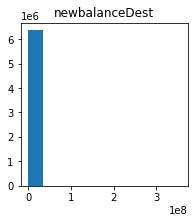

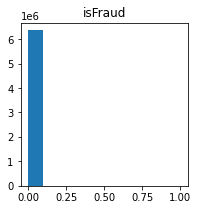

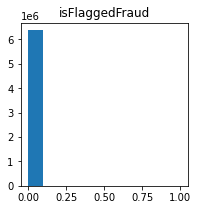

In [9]:
# Histograma das colunas númericas
for col in df.columns: 
    if df.dtypes[col] in ('int64','float64'):
        fig = plt.figure(figsize =(3, 3))
        plt.title(col)
        pyplot.hist(df[col])
        pyplot.show()

In [10]:
# Teste de Shapiro
variavel_normal = 0
variavel_nao_normal = 0

from scipy.stats import shapiro
for col in df.columns: 
    if df.dtypes[col] in ('int64','float64'):
        stat, p = shapiro(df[col])
        print(col)
        print('Statistics=%.3f, p=%.23f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Distribuição Normal')
            variavel_normal += 1
        else:
            print('Distribuição não normal')
            variavel_nao_normal += 1
        print("----------------------------")
quantidade_variaveis = variavel_normal + variavel_nao_normal
resultado_shapiro,distribuicao_normal = ("seguem uma distribuição normal",1) \
                                        if variavel_normal > variavel_nao_normal \
                                        else ("não seguem uma distribuição normal",0)
print(f'Com base na análise das {quantidade_variaveis} variáveis numéricas através do teste de Shapiro, \n' 
      f'foi possível verificar que a maioria das variáveis {resultado_shapiro}. \n'
      f'Quantidade variáveis que seguem uma distribuição normal:{variavel_normal} \n'
      f'Quantidade variáveis que não seguem uma distribuição normal:{variavel_nao_normal} \n')

step
Statistics=0.965, p=0.00000000000000000000000
Distribuição não normal
----------------------------
amount
Statistics=0.193, p=0.00000000000000000000000
Distribuição não normal
----------------------------
oldbalanceOrg
Statistics=0.323, p=0.00000000000000000000000
Distribuição não normal
----------------------------
newbalanceOrig
Statistics=0.331, p=0.00000000000000000000000
Distribuição não normal
----------------------------
oldbalanceDest
Statistics=0.299, p=0.00000000000000000000000
Distribuição não normal
----------------------------
newbalanceDest
Statistics=0.302, p=0.00000000000000000000000
Distribuição não normal
----------------------------
isFraud
Statistics=0.014, p=0.00000000000000000000000
Distribuição não normal
----------------------------
isFlaggedFraud
Statistics=0.000, p=0.00000000000000000000000
Distribuição não normal
----------------------------
Com base na análise das 8 variáveis numéricas através do teste de Shapiro, 
foi possível verificar que a maioria d

*   Analise de correlação mostrou que a coluna AMOUNT tem uma alta correlação positiva com a coluna ISFRAUD, já as que envolvem o BALANCE tem uma alta correlação negativa

* Foi feito um histograma das colunas númericas para verificar a distribuição dos dados, com isso vimos que os dados não seguem uma distribuição normal

* Com o teste de Shapiro conseguimos ver que realmente o dataset não segue uma distribuição normal



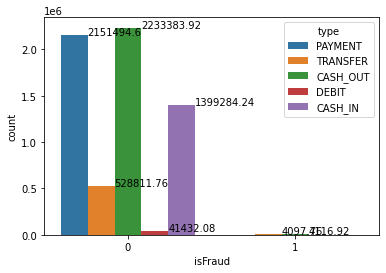

In [11]:
# plot da coluna 'type'
fig, ax = plt.subplots()
sb.countplot(df.isFraud,hue=df.type,ax=ax)
for i in ax.patches:
  valor = i.get_x() + i.get_height()
  x = i.get_x() + i.get_width()
  y = i.get_y() + i.get_height()
  ax.annotate(valor,(x,y))


In [12]:
# Observando quais transações tem ocorrência de fraude
print('Tipos de transações Fraudulentos: ', list(df.loc[(df.isFraud == 1)].type.unique()))

Tipos de transações Fraudulentos:  ['TRANSFER', 'CASH_OUT']


In [13]:
# Vendo a distribuição dos dados que tem ocorrência de fraude
print(df['isFraud'].value_counts())
print('=-' *15)
print(df['isFraud'].value_counts(normalize=True))

0    6354407
1       8213
Name: isFraud, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
0    0.998709
1    0.001291
Name: isFraud, dtype: float64


*   Decidimos olhar a coluna TYPE para observar quais transações tem maior indice de fraude, com isso conseguimos ver que apenas dois tipos de transações nesse exemplo são sinalizados com fraude, TRANSFER e CASH_OUT

*   Olhando somente os valores de fraude ou não, temos uma melhor visão de que o dataset está muito desbalanciado cerca de 99% dos dados não são fraudes

In [14]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
len(df.loc[(df['isFlaggedFraud'] == 1)& (df.isFraud == 1)])

16

*   Olhando a coluna ISFRAGGEDFRAUD conseguimos ver que existiam 16 sinalizações de possiveis fraudes então comparamos com a coluna ISFRAUD e vimos que todas as sinalizações em ISFRAGGEDFRAUD estão presentes em ISFRAUD então é uma coluna que não parece útil.

### ***Data Cleaning*** and ***Feature Engineering***

In [16]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace = True)

In [17]:
df2 = df.loc[(df.type == 'TRANSFER')|(df.type == 'CASH_OUT')]

In [18]:
df2['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [19]:
df2['type'] = LabelEncoder().fit_transform(df2['type'])

*   Agora retiramos as colunas que após a analise não fazem sentido para o problema.

*   Como já tinhamos visto as transações com ocorrência de fraude são apenas 'TRANSFER' e 'CASH_OUT' então tratamos a coluna type deixando apenas as transações com ocorrências.

*   Com o LabelEncoder tratamos a coluna type e colocamos os valores entre 0 e 1 lembrando que essa era nossa única coluna texto.






### ***Modelling***

In [20]:
# Separando a coluna target em 'y' e o restante do dataset para normalizar em 'X'
X = df2.drop(columns=['isFraud'])
y = df2['isFraud']

In [21]:
# Normalização
X_norm = MinMaxScaler().fit_transform(X)
X_norm

array([[0.00000000e+00, 1.00000000e+00, 1.95790998e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.95790998e-06, ...,
        0.00000000e+00, 5.94973445e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.47858358e-03, ...,
        0.00000000e+00, 1.42774526e-05, 1.44627841e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 6.82716643e-02, ...,
        0.00000000e+00, 1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 1.00000000e+00, 9.19463216e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.19463216e-03, ...,
        0.00000000e+00, 1.82859791e-02, 2.06640365e-02]])

In [22]:
# Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm,
                                                    y,
                                                    test_size = .30,
                                                    random_state=42)

In [23]:
# Modelo de regressão logistica
logitic = linear_model.LogisticRegression()
logitic.fit(X_train,y_train)
y_pred = logitic.predict(X_test)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.98      0.09      0.16      2496

    accuracy                           1.00    831123
   macro avg       0.99      0.54      0.58    831123
weighted avg       1.00      1.00      1.00    831123



0.9972591301167216

### Conclusão:

*   Após a analise nosso modelo teve uma precisão de 98% estamos levando em conta somente a precisão pois nesse caso o falso positivo pode ser mais prejudicial financeiramente, foram feitos vários testes e nosso melhor resultado foi esse, usamos também o normalizador ‘StandarScaler’ e tivemos um resultado de 90% de precisão com isso escolhemos o ‘MinMaxScaler’.

*   O problema parece a quantidade de ocorrências de fraude o que dificulta fazendo com que o dataset seja desequilibrado, acreditamos que com mais exemplos e melhor tratamento dos dados nos conseguiremos melhorar as métricas.

